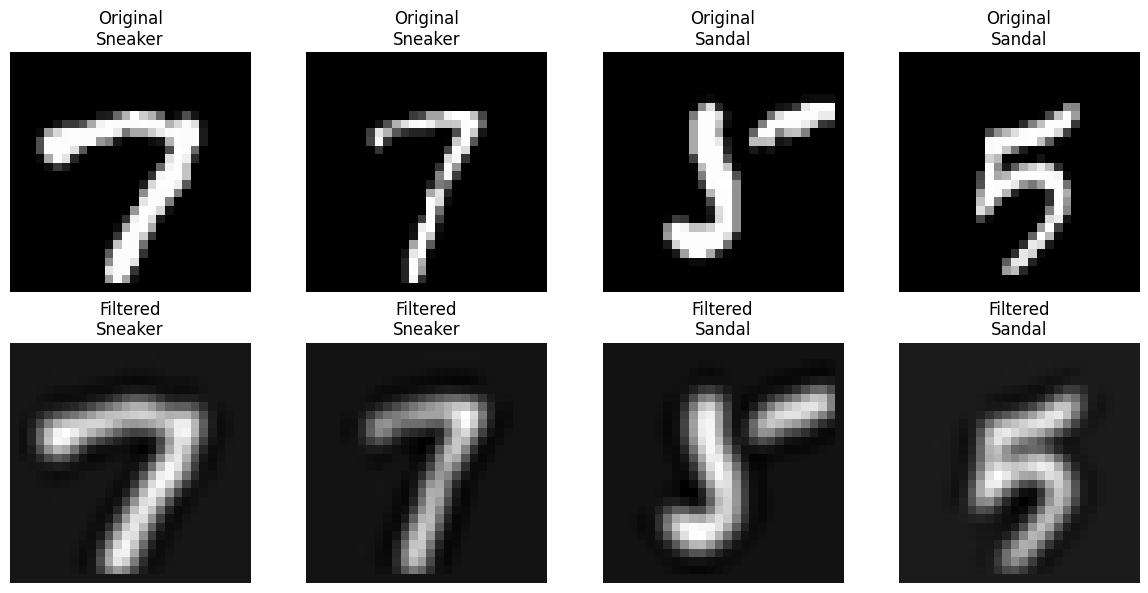

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

class_names = ["Sandal", "Sneaker", "Bag"]
labels_to_display = [5, 7, 8]
df = pd.DataFrame({'image': list(train.iloc[:, 1:].values.reshape(-1, 28, 28)), 'label': train.iloc[:, 0]})
filtered_df = df[df['label'].isin(labels_to_display)]

random_indices = np.random.choice(filtered_df.index, 4, replace=False)
selected_images = [(filtered_df.loc[idx]['image'], class_names[labels_to_display.index(filtered_df.loc[idx]['label'])]) for idx in random_indices]

def butterworth_filter(image, cutoff=0.2, order=2):
    b, a = butter(order, cutoff, btype='low', analog=False, output='ba', fs=1.0)
    filtered_image = np.zeros_like(image)
    for row_idx in range(image.shape[0]):
        filtered_image[row_idx, :] = filtfilt(b, a, image[row_idx, :])
    for col_idx in range(image.shape[1]):
        filtered_image[:, col_idx] = filtfilt(b, a, filtered_image[:, col_idx])
    return filtered_image

plt.figure(figsize=(12, 6))
for i, (image, label) in enumerate(selected_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Original\n{label}")
    plt.axis('off')
    filtered_image = butterworth_filter(image)
    plt.subplot(2, 4, i + 5)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"Filtered\n{label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
